In [2]:
# -*- coding:utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn import cross_validation
from sklearn import metrics
from xgboost.sklearn import XGBClassifier
from sklearn.grid_search import GridSearchCV

% matplotlib inline

/home/liu/py3venv/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/liu/py3venv/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
path = '/home/liu/mysoft/pycharm/project/quantist/quantist/kaggle/TalkingData/'

In [4]:
# # Look at train
# train = pd.read_csv(path + "train.csv", nrows=10000)
# print(train.head())
# print(train.describe())
# print(train.info())

In [7]:
# Look at test
test = pd.read_csv(path + "test.csv")
print(test.head())

   click_id      ip  app  device  os  channel           click_time
0         0    5744    9       1   3      107  2017-11-10 04:00:00
1         1  119901    9       1   3      466  2017-11-10 04:00:00
2         2   72287   21       1  19      128  2017-11-10 04:00:00
3         3   78477   15       1  13      111  2017-11-10 04:00:00
4         4  123080   12       1  13      328  2017-11-10 04:00:00


In [9]:
# Look at sample_submission

# sample_submission = pd.read_csv(path + "sample_submission.csv")
# print(sample_submission.head())

In [10]:
# Look at sample_train_sample 

train_sample = pd.read_csv(path + "train_sample.csv")
print(train_sample.head())

       ip  app  device  os  channel           click_time attributed_time  \
0   87540   12       1  13      497  2017-11-07 09:30:38             NaN   
1  105560   25       1  17      259  2017-11-07 13:40:27             NaN   
2  101424   12       1  19      212  2017-11-07 18:05:24             NaN   
3   94584   13       1  13      477  2017-11-07 04:58:08             NaN   
4   68413   12       1   1      178  2017-11-09 09:00:09             NaN   

   is_attributed  
0              0  
1              0  
2              0  
3              0  
4              0  


In [10]:
# print(train.describe())
# print(train.info())

In [12]:
# print(test.describe())
# print(test.info())

           click_id            ip           app        device            os  \
count  1.879047e+07  1.879047e+07  1.879047e+07  1.879047e+07  1.879047e+07   
mean   9.395234e+06  6.306921e+04  1.221480e+01  1.730513e+00  1.873312e+01   
std    5.424341e+06  3.688597e+04  1.164924e+01  2.597038e+01  1.135059e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    4.697617e+06  3.155800e+04  3.000000e+00  1.000000e+00  1.300000e+01   
50%    9.395234e+06  6.393600e+04  1.200000e+01  1.000000e+00  1.800000e+01   
75%    1.409285e+07  9.531600e+04  1.800000e+01  1.000000e+00  1.900000e+01   
max    1.879047e+07  1.264130e+05  5.210000e+02  3.031000e+03  6.040000e+02   

            channel  
count  1.879047e+07  
mean   2.648059e+02  
std    1.355254e+02  
min    0.000000e+00  
25%    1.350000e+02  
50%    2.360000e+02  
75%    4.010000e+02  
max    4.980000e+02  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18790469 entries, 0 to 18790468
Data col

           click_id            ip           app        device            os  \
count  1.879047e+07  1.879047e+07  1.879047e+07  1.879047e+07  1.879047e+07   
mean   9.395234e+06  6.306921e+04  1.221480e+01  1.730513e+00  1.873312e+01   
std    5.424341e+06  3.688597e+04  1.164924e+01  2.597038e+01  1.135059e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    4.697617e+06  3.155800e+04  3.000000e+00  1.000000e+00  1.300000e+01   
50%    9.395234e+06  6.393600e+04  1.200000e+01  1.000000e+00  1.800000e+01   
75%    1.409285e+07  9.531600e+04  1.800000e+01  1.000000e+00  1.900000e+01   
max    1.879047e+07  1.264130e+05  5.210000e+02  3.031000e+03  6.040000e+02   

            channel  
count  1.879047e+07  
mean   2.648059e+02  
std    1.355254e+02  
min    0.000000e+00  
25%    1.350000e+02  
50%    2.360000e+02  
75%    4.010000e+02  
max    4.980000e+02  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18790469 entries, 0 to 18790468
Data col

In [13]:
# print(sample_submission.describe())
# print(sample_submission.info())

In [14]:
# print(train_sample.describe())
# print(train_sample.info())

                  ip           app         device             os  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean    91255.879670      12.04788      21.771250      22.818280   
std     69835.553661      14.94150     259.667767      55.943136   
min         9.000000       1.00000       0.000000       0.000000   
25%     40552.000000       3.00000       1.000000      13.000000   
50%     79827.000000      12.00000       1.000000      18.000000   
75%    118252.000000      15.00000       1.000000      19.000000   
max    364757.000000     551.00000    3867.000000     866.000000   

             channel  is_attributed  
count  100000.000000  100000.000000  
mean      268.832460       0.002270  
std       129.724248       0.047591  
min         3.000000       0.000000  
25%       145.000000       0.000000  
50%       258.000000       0.000000  
75%       379.000000       0.000000  
max       498.000000       1.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIn

In [15]:
# Preprocessing the train_sample

# # 把月、日、和 小时单独拎出来，放到3列中
# df_train['month'] = pd.DatetimeIndex(df_train.datetime).month
# df_train['day'] = pd.DatetimeIndex(df_train.datetime).dayofweek
# df_train['hour'] = pd.DatetimeIndex(df_train.datetime).hour
# 
# dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix= 'Cabin')
# 
# dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix= 'Embarked')
# 
# dummies_Sex = pd.get_dummies(data_train['Sex'], prefix= 'Sex')
# 
# dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix= 'Pclass')
# 
# df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
# df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
# df

#        ip  app  device  os  channel           click_time attributed_time  \
# 0   83230    3       1  13      379  2017-11-06 14:32:21             NaN  
# Preprocessing click_time 2017-11-06 14:32:21

# train_sample['year'] = pd.DatetimeIndex(train_sample.click_time).year
# train_sample['month'] = pd.DatetimeIndex(train_sample.click_time).month
# train_sample['day'] = pd.DatetimeIndex(train_sample.click_time).day
# train_sample['hour'] = pd.DatetimeIndex(train_sample.click_time).hour
# train_sample['minute'] = pd.DatetimeIndex(train_sample.click_time).minute
# train_sample['seconds'] = pd.DatetimeIndex(train_sample.click_time).seconds

# print(train_sample[:3])

       ip  app  device  os  channel           click_time attributed_time  \
0   87540   12       1  13      497  2017-11-07 09:30:38             NaN   
1  105560   25       1  17      259  2017-11-07 13:40:27             NaN   
2  101424   12       1  19      212  2017-11-07 18:05:24             NaN   

   is_attributed  year  month  day  hour  minute  second  
0              0  2017     11    7     9      30      38  
1              0  2017     11    7    13      40      27  
2              0  2017     11    7    18       5      24  


In [16]:
# train_sample['is_attributed'].value_counts()

0    99773
1      227
Name: is_attributed, dtype: int64

In [19]:
# train['is_attributed'].value_counts()

In [12]:
# Test
"""
   click_id      ip  app  device  os  channel           click_time
0         0    5744    9       1   3      107  2017-11-10 04:00:00
"""
# train_sample
"""
       ip  app  device  os  channel           click_time attributed_time  is_attributed
0   87540   12       1  13      497  2017-11-07 09:30:38             NaN   0
"""
# IDcol = 'attributed_time'
# click_time = 'click_time'

# train_sample = [x for x in test.columns if x not in [is_attributed, attributed_time, click_time]]
# test_sample = [x for x in test.columns if x not in ['click_id', 'click_time']]
# test_sample = [[test['ip'], test['app'], test['device'], test['channel']]]
print(test.columns)
# test_sample = test.drop(['click_id'], axis = 1)
temp_dict = {'ip':test['ip'], 'app':test['app'],'device':test['device'], 'channel':test['channel']}
test_sample = pd.DataFrame(temp_dict)
print(test_sample[:3])

Index(['click_id', 'ip', 'app', 'device', 'os', 'channel', 'click_time'], dtype='object')


   app  channel  device      ip
0    9      107       1    5744
1    9      466       1  119901
2   21      128       1   72287


In [14]:


target = 'is_attributed'
# IDcol = 'ID'
IDcol = 'attributed_time'
click_time = 'click_time'
click_id = 'click_id'


In [15]:


# predictors = [x for x in train_sample.columns if x not in [target, IDcol, click_time, click_id]]
def modelfit(alg, dtrain, dtest, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):

    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        xgtest = xgb.DMatrix(dtest[predictors].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
             early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #建模
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #对训练集预测
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #输出模型的一些结果
    print("\n关于现在这个模型")
    print("准确率 : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print("AUC 得分 (训练集): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
                
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')




关于现在这个模型
准确率 : 0.9985


AUC 得分 (训练集): 0.993478


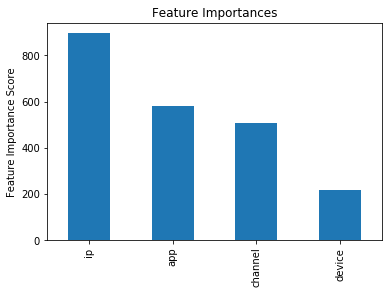

In [16]:
predictors = [x for x in train_sample.columns if x not in [target, IDcol, click_time, click_id, 'os', 'year', 'month', 'day', 'hour', 'minute', 'second']]
xgb1 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=1000,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27)
modelfit(xgb1, train_sample, test_sample, predictors)